<a href="https://colab.research.google.com/github/harshjoshi23/leafdetection/blob/main/YoloLeafDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/MyDrive/baseyolo/yolov3_training_last.weights", "/content/gdrive/MyDrive/baseyolo/yolo_custom_detection/yolov3_testing.cfg")



In [28]:
# Name custom object
classes = ["leaf"]

### LEAF DATASET 

In [29]:
images_path = glob.glob(r"/content/gdrive/MyDrive/baseyolo/images/*.jpg")


### CUSTOM DATASET OF N OBECTS 

In [30]:
#images_path = glob.glob(r"C:\Users\harshvardhan.j\Desktop\classifi\baseyolo\yolo_custom_detection\customtest\Sorted\*.jpg")


In [31]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


In [32]:
random.shuffle(images_path)

In [33]:
# def cv2_imshow(a):
#   """A replacement for cv2.imshow() for use in Jupyter notebooks.
#   Args:
#     a : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
#       (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
#       image.
#   """
#   a = a.clip(0, 255).astype('uint8')
#   # cv2 stores colors as BGR; convert to RGB
#   if a.ndim == 3:
#     if a.shape[2] == 4:
#       a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
#     else:
#       a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
#   display.display(PIL.Image.fromarray(a))


# cv_imshow = cv2_imshow

0
[[0]]


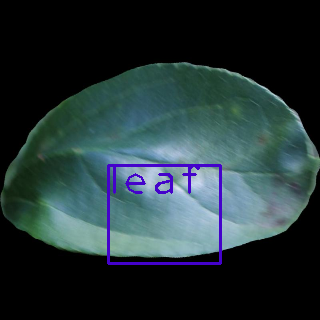

0
0
0
[[1]
 [2]
 [0]]


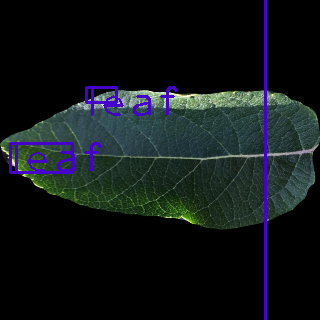

0
0
0
0
[[3]
 [1]
 [0]
 [2]]


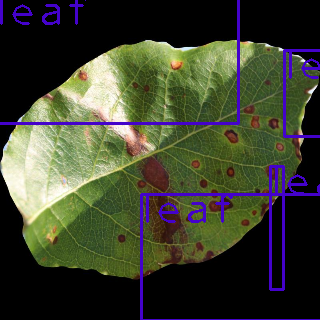

0
0
0
[[2]
 [1]
 [0]]


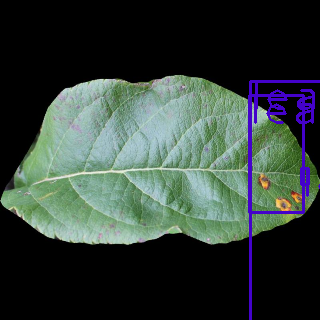

0
0
0
0
[[0]
 [1]
 [3]
 [2]]


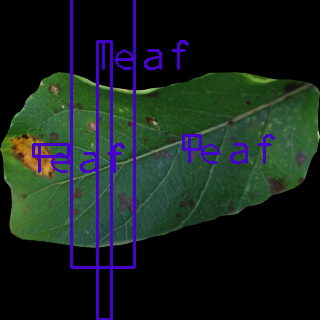

0
0
[[1]
 [0]]


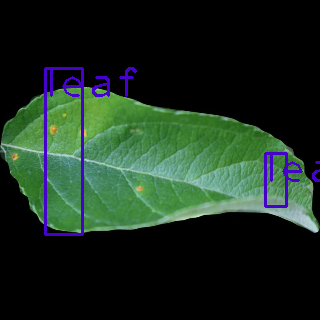

0
0
0
0
0
0
0
0
[[2]
 [5]
 [0]
 [7]
 [6]
 [1]
 [4]]


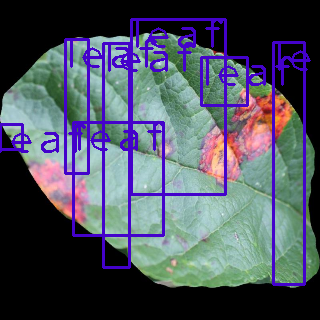

0


KeyboardInterrupt: ignored

In [34]:
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


    cv2_imshow(img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()